In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')

# Import and concatenate files

In [3]:
def load_original_data(a):
    df = pd.read_csv(a)
    return df

def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

def no_column_space(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

##def drop_columns(df) :
##    df.drop(columns=['##', '##', '##'], inplace=True)
##    return df

In [4]:
df=load_original_data('data/Life Expectancy Data.csv') 

df = lower_case_column_names(df)

df = no_column_space(df)

##df = drop_columns(df)##

In [5]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy_', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles_', '_bmi_', 'under-five_deaths_', 'polio', 'total_expenditure',
       'diphtheria_', '_hiv/aids', 'gdp', 'population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [6]:
df.columns = (['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population',
       '_thinness_1_19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'])

# Add/drop columns and rows

In [7]:
##drop duplicated rows
df.drop_duplicates()

country  year      status  life_expectancy  adult_mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

       bmi  under_five_deaths  polio  total_expenditure  diphtheria  hiv_aids  \
0     19.1                 83    6.0               8.16        65.0       0.1   
1     18.6                 86   58.0               8.18        62.0       0.1   
2     18.1                 89   62.0               8.13        64.0       0.1   
3     17.6                 93   67.0               8.52        67.0       0.1   
4     17.2                 97   68.0               7.87        68.0       0.1   
...    ...                ...    ...                ...         ...       ...   
2933  27.1                 42   67.0               7.13        65.0      33.6   
2934  26.7                 41    7.0               6.52        68.0      36.7   
2935  26.3                 40   73.0               6.53        71.0      39.8   
2936  25.9                 39   76.0               6.16        75.0      42.1   
2937  25.5                 39   78.0               7.10        78.0      43.5   

             gdp  population  _thinness_1_19_years  thinness_5-9_years  \
0     584.259210  33736494.0                  17.2                17.3   
1     612.696514    327582.0                  17.5                17.5   
2     631.744976  31731688.0                  17.7                17.7   
3     669.959000   3696958.0                  17.9                18.0   
4      63.537231   2978599.0                  18.2                18.2   
...          ...         ...                   ...                 ...   
2933  454.366654  12777511.0                   9.4                 9.4   
2934  453.351155  12633897.0                   9.8                 9.9   
2935   57.348340    125525.0                   1.2                 1.3   
2936  548.587312  12366165.0                   1.6                 1.7   
2937  547.358878  12222251.0                  11.0                11.2   

      income_composition_of_resources  schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                         

In [8]:
df.country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2933       Zimbabwe
2934       Zimbabwe
2935       Zimbabwe
2936       Zimbabwe
2937       Zimbabwe
Name: country, Length: 2938, dtype: object

# Plotting for first impression

In [9]:
df.corr()

year  life_expectancy  adult_mortality  \
year                             1.000000         0.170033        -0.079052   
life_expectancy                  0.170033         1.000000        -0.696359   
adult_mortality                 -0.079052        -0.696359         1.000000   
infant_deaths                   -0.037415        -0.196557         0.078756   
alcohol                         -0.052990         0.404877        -0.195848   
percentage_expenditure           0.031400         0.381864        -0.242860   
hepatitis_b                      0.104333         0.256762        -0.162476   
measles                         -0.082493        -0.157586         0.031176   
bmi                              0.108974         0.567694        -0.387017   
under_five_deaths               -0.042937        -0.222529         0.094146   
polio                            0.094158         0.465556        -0.274823   
total_expenditure                0.090740         0.218086        -0.115281   
diphtheria                       0.134337         0.479495        -0.275131   
hiv_aids                        -0.139741        -0.556556         0.523821   
gdp                              0.101620         0.461455        -0.296049   
population                       0.016969        -0.021538        -0.013647   
_thinness_1_19_years            -0.047876        -0.477183         0.302904   
thinness_5-9_years              -0.050929        -0.471584         0.308457   
income_composition_of_resources  0.243468         0.724776        -0.457626   
schooling                        0.209400         0.751975        -0.454612   

                                 infant_deaths   alcohol  \
year                                 -0.037415 -0.052990   
life_expectancy                      -0.196557  0.404877   
adult_mortality                       0.078756 -0.195848   
infant_deaths                         1.000000 -0.115638   
alcohol                              -0.115638  1.000000   
percentage_expenditure               -0.085612  0.341285   
hepatitis_b                          -0.223566  0.087549   
measles                               0.501128 -0.051827   
bmi                                  -0.227279  0.330408   
under_five_deaths                     0.996629 -0.112370   
polio                                -0.170689  0.221734   
total_expenditure                    -0.128616  0.296942   
diphtheria                           -0.175171  0.222020   
hiv_aids                              0.025231 -0.048845   
gdp                                  -0.108427  0.354712   
population                            0.556801 -0.035252   
_thinness_1_19_years                  0.465711 -0.428795   
thinness_5-9_years                    0.471350 -0.417414   
income_composition_of_resources      -0.145139  0.450040   
schooling                            -0.193720  0.547378   

                                 percentage_expenditure  hepatitis_b  \
year                                           0.031400     0.104333   
life_expectancy                                0.381864     0.256762   
adult_mortality                               -0.242860    -0.162476   
infant_deaths                                 -0.085612    -0.223566   
alcohol                                        0.341285     0.087549   
percentage_expenditure                         1.000000     0.016274   
hepatitis_b                                    0.016274     1.000000   
measles                                       -0.056596    -0.120529   
bmi                                            0.228700     0.150380   
under_five_deaths                             -0.087852    -0.233126   
polio                                          0.147259     0.486171   
total_expenditure                              0.174420     0.058280   
diphtheria                                     0.143624     0.611495   
hiv_aids                                      -0.097857    -0.112675   
gdp                                 

In [10]:
df.style.background_gradient(cmap='Blues')


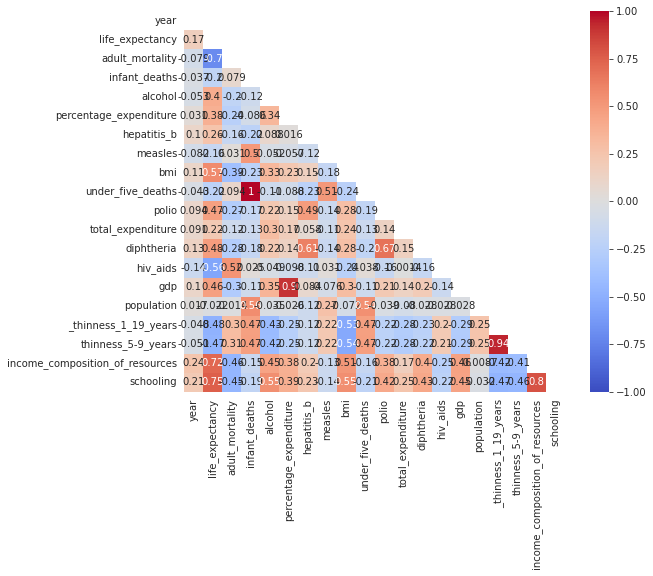

In [11]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Clean the NaN 


In [12]:
df.columns[df.isna().any()].tolist()

['life_expectancy',
 'adult_mortality',
 'alcohol',
 'hepatitis_b',
 'bmi',
 'polio',
 'total_expenditure',
 'diphtheria',
 'gdp',
 'population',
 '_thinness_1_19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

## Clean the life_expectancy


In [13]:
df.fillna(df.mean(), inplace=True)
##Testing for replacing all rows with NaN.

In [14]:
df_life_expectancy_clean = df[df['life_expectancy'].isnull()]
df_life_expectancy_clean = 
## Should not drop life_expectancy because it is a independant variable. 
## And the number of NaN values at this columns is not significant.

SyntaxError: invalid syntax (4276694518.py, line 2)

## Clean adult_mortality. 
The adult mortality rate shown in the World Development Indicators (WDI) database and related products refers to 
the probability that those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons). 
In other words, a value of 150 means that out of 1,000 persons who have reached age 15, 150 are expected to 
die before reaching age 60, and 850 are expected to survive to age 60. This is based on a “synthetic cohort”: 
current life-table mortality rates are applied to the current cohort of 15 year olds, assuming no changes in mortality.

In [16]:
df[df['adult_mortality'].isnull()]
## Same case as life expectancy.

Empty DataFrame
Columns: [country, year, status, life_expectancy, adult_mortality, infant_deaths, alcohol, percentage_expenditure, hepatitis_b, measles, bmi, under_five_deaths, polio, total_expenditure, diphtheria, hiv_aids, gdp, population, _thinness_1_19_years, thinness_5-9_years, income_composition_of_resources, schooling]
Index: []

## Clean alcohol

In [17]:
df[df['alcohol'].isnull()]

Empty DataFrame
Columns: [country, year, status, life_expectancy, adult_mortality, infant_deaths, alcohol, percentage_expenditure, hepatitis_b, measles, bmi, under_five_deaths, polio, total_expenditure, diphtheria, hiv_aids, gdp, population, _thinness_1_19_years, thinness_5-9_years, income_composition_of_resources, schooling]
Index: []

# Get the numeric and categoric

In [18]:
numericals_features =df._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

year  life_expectancy  adult_mortality  infant_deaths  alcohol  \
0  2015             65.0            263.0             62     0.01   
1  2014             59.9            271.0             64     0.01   
2  2013             59.9            268.0             66     0.01   
3  2012             59.5            272.0             69     0.01   
4  2011             59.2            275.0             71     0.01   

   percentage_expenditure  hepatitis_b  measles   bmi  under_five_deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   polio  total_expenditure  diphtheria  hiv_aids         gdp  population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   _thinness_1_19_years  thinness_5-9_years  income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [19]:
numericals_features_scaled=StandardScaler().fit_transform(numericals_features)
numericals_features_scaled = pd.DataFrame(numericals_features_scaled, index= numericals_features.index, columns= numericals_features.columns)


In [20]:
## Get Categorical data

categoricals_features = df.select_dtypes(object)

# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [21]:
numericals_features_scaled

year  life_expectancy  adult_mortality  infant_deaths   alcohol  \
0     1.621762        -0.444448         0.791586       0.268824 -1.172958   
1     1.404986        -0.980950         0.856072       0.285786 -1.172958   
2     1.188210        -0.980950         0.831890       0.302749 -1.172958   
3     0.971434        -1.023029         0.864132       0.328193 -1.172958   
4     0.754658        -1.054587         0.888314       0.345155 -1.172958   
...        ...              ...              ...            ...       ...   
2933 -0.762774        -2.622015         4.499494      -0.028022 -0.062024   
2934 -0.979550        -2.600976         4.435009      -0.036503 -0.138640   
2935 -1.196326        -2.569417        -0.739941      -0.044984 -0.044146   
2936 -1.413102        -2.516818         4.201249      -0.044984 -0.736246   
2937 -1.629878        -2.443181         4.031975      -0.053466 -0.746462   

      percentage_expenditure  hepatitis_b   measles       bmi  \
0                  -0.335570    -0.705861 -0.110384 -0.964715   
1                  -0.334441    -0.838704 -0.168124 -0.989810   
2                  -0.334594    -0.750142 -0.173531 -1.014905   
3                  -0.332096    -0.617299  0.032045 -1.040000   
4                  -0.367862    -0.573018  0.051757 -1.060076   
...                      ...          ...       ...       ...   
2933               -0.371433    -0.573018 -0.208332 -0.563194   
2934               -0.371433    -3.274163 -0.123991 -0.583270   
2935               -0.371433    -0.351612 -0.184521 -0.603346   
2936               -0.371433    -0.218769 -0.164897 -0.623422   
2937               -0.371433    -0.085926 -0.081689 -0.643498   

      under_five_deaths     polio  total_expenditure  diphtheria  hiv_aids  \
0              0.255359 -3.278638           0.925806   -0.732952 -0.323445   
1              0.274060 -1.051482           0.934140   -0.859877 -0.323445   
2              0.292761 -0.880163           0.913306   -0.775260 -0.323445   
3              0.317696 -0.666013           1.075815   -0.648335 -0.323445   
4              0.342631 -0.623183           0.804966   -0.606027 -0.323445   
...                 ...       ...                ...         ...       ...   
2933          -0.000223 -0.666013           0.496616   -0.732952  6.275044   
2934          -0.006456 -3.235808           0.242435   -0.606027  6.885650   
2935          -0.012690 -0.409034           0.246602   -0.479102  7.496256   
2936          -0.018924 -0.280544           0.092426   -0.309869  7.949287   
2937          -0.018924 -0.194884           0.484115   -0.182944  8.225045   

           gdp  population  _thinness_1_19_years  thinness_5-9_years  \
0    -0.525248    0.389975              2.813130            2.773279   
1    -0.523083   -0.230936              2.881408            2.817902   
2    -0.521632    0.352715              2.926927            2.862526   
3    -0.518723   -0.168315              2.972446            2.929461   
4    -0.564893   -0.181666              3.040724            2.974085   
...        ...         ...                   ...                 ...   
2933 -0.535137    0.000449              1.037896            1.010651   
2934 -0.535214   -0.002221              1.128934            1.122210   
2935 -0.565364   -0.234691             -0.828375           -0.796600   
2936 -0.527964   -0.007196             -0.737337           -0.707353   
2937 -0.528057   -0.009871              1.402047            1.412263   

      income_composition_of_resources  schooling  
0                           -0.725401  -0.579931  
1                           -0.740050  -0.610570  
2                           -0.769349  -0.641209  
3                           -0.803531  -0.671847  
4                           -0.847480  -0.763764  
...                               ...        ...  
2933                        -1.076989  -0.855681  
2934                        -1.023274  -0.763764  
2935                        -0.979326  -0.6

In [22]:
categoricals_features

country_Albania  country_Algeria  country_Angola  \
0                   0                0               0   
1                   0                0               0   
2                   0                0               0   
3                   0                0               0   
4                   0                0               0   
...               ...              ...             ...   
2933                0                0               0   
2934                0                0               0   
2935                0                0               0   
2936                0                0               0   
2937                0                0               0   

      country_Antigua and Barbuda  country_Argentina  country_Armenia  \
0                               0                  0                0   
1                               0                  0                0   
2                               0                  0                0   
3                               0                  0                0   
4                               0                  0                0   
...                           ...                ...              ...   
2933                            0                  0                0   
2934                            0                  0                0   
2935                            0                  0                0   
2936                            0                  0                0   
2937                            0                  0                0   

      country_Australia  country_Austria  country_Azerbaijan  country_Bahamas  \
0                     0                0                   0                0   
1                     0                0                   0                0   
2                     0                0                   0                0   
3                     0                0                   0                0   
4                     0                0                   0                0   
...                 ...              ...                 ...              ...   
2933                  0                0                   0                0   
2934                  0                0                   0                0   
2935                  0                0                   0                0   
2936                  0                0                   0                0   
2937                  0                0                   0                0   

      country_Bahrain  country_Bangladesh  country_Barbados  country_Belarus  \
0                   0                   0                 0                0   
1                   0                   0                 0                0   
2                   0                   0                 0                0   
3                   0                   0                 0                0   
4                   0                   0                 0                0   
...               ...                 ...               ...              ...   
2933                0                   0                 0                0   
2934                0                   0                 0                0   
2935                0                   0                 0                0   
2936                0                   0                 0                0   
2937                0                   0                 0                0   

      country_Belgium  country_Belize  country_Benin  country_Bhutan  \
0                   0               0              0               0   
1                   0               0              0               0   
2                   0               0              0               0   
3                   0               0              0               0   
4                   0               0              0               0   
...               ...             ...            ...             .

In [23]:
all_features=pd.concat([numericals_features_scaled, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features = all_features.reset_index()
type(all_features)

pandas.core.frame.DataFrame

In [24]:
x=numericals_features_scaled.drop(['life_expectancy'], axis=1)
y=numericals_features_scaled.life_expectancy

In [25]:
x

year  adult_mortality  infant_deaths   alcohol  \
0     1.621762         0.791586       0.268824 -1.172958   
1     1.404986         0.856072       0.285786 -1.172958   
2     1.188210         0.831890       0.302749 -1.172958   
3     0.971434         0.864132       0.328193 -1.172958   
4     0.754658         0.888314       0.345155 -1.172958   
...        ...              ...            ...       ...   
2933 -0.762774         4.499494      -0.028022 -0.062024   
2934 -0.979550         4.435009      -0.036503 -0.138640   
2935 -1.196326        -0.739941      -0.044984 -0.044146   
2936 -1.413102         4.201249      -0.044984 -0.736246   
2937 -1.629878         4.031975      -0.053466 -0.746462   

      percentage_expenditure  hepatitis_b   measles       bmi  \
0                  -0.335570    -0.705861 -0.110384 -0.964715   
1                  -0.334441    -0.838704 -0.168124 -0.989810   
2                  -0.334594    -0.750142 -0.173531 -1.014905   
3                  -0.332096    -0.617299  0.032045 -1.040000   
4                  -0.367862    -0.573018  0.051757 -1.060076   
...                      ...          ...       ...       ...   
2933               -0.371433    -0.573018 -0.208332 -0.563194   
2934               -0.371433    -3.274163 -0.123991 -0.583270   
2935               -0.371433    -0.351612 -0.184521 -0.603346   
2936               -0.371433    -0.218769 -0.164897 -0.623422   
2937               -0.371433    -0.085926 -0.081689 -0.643498   

      under_five_deaths     polio  total_expenditure  diphtheria  hiv_aids  \
0              0.255359 -3.278638           0.925806   -0.732952 -0.323445   
1              0.274060 -1.051482           0.934140   -0.859877 -0.323445   
2              0.292761 -0.880163           0.913306   -0.775260 -0.323445   
3              0.317696 -0.666013           1.075815   -0.648335 -0.323445   
4              0.342631 -0.623183           0.804966   -0.606027 -0.323445   
...                 ...       ...                ...         ...       ...   
2933          -0.000223 -0.666013           0.496616   -0.732952  6.275044   
2934          -0.006456 -3.235808           0.242435   -0.606027  6.885650   
2935          -0.012690 -0.409034           0.246602   -0.479102  7.496256   
2936          -0.018924 -0.280544           0.092426   -0.309869  7.949287   
2937          -0.018924 -0.194884           0.484115   -0.182944  8.225045   

           gdp  population  _thinness_1_19_years  thinness_5-9_years  \
0    -0.525248    0.389975              2.813130            2.773279   
1    -0.523083   -0.230936              2.881408            2.817902   
2    -0.521632    0.352715              2.926927            2.862526   
3    -0.518723   -0.168315              2.972446            2.929461   
4    -0.564893   -0.181666              3.040724            2.974085   
...        ...         ...                   ...                 ...   
2933 -0.535137    0.000449              1.037896            1.010651   
2934 -0.535214   -0.002221              1.128934            1.122210   
2935 -0.565364   -0.234691             -0.828375           -0.796600   
2936 -0.527964   -0.007196             -0.737337           -0.707353   
2937 -0.528057   -0.009871              1.402047            1.412263   

      income_composition_of_resources  schooling  
0                           -0.725401  -0.579931  
1                           -0.740050  -0.610570  
2                           -0.769349  -0.641209  
3                           -0.803531  -0.671847  
4                           -0.847480  -0.763764  
...                               ...        ...  
2933                        -1.076989  -0.855681  
2934                        -1.023274  -0.763764  
2935                        -0.979326  -0.610570  
2936                        -0.979326  -0.671847  
2937                        -0.945143  -0.671847  

[2938 rows x 19 columns]

In [26]:
y

0      -0.444448
1      -0.980950
2      -0.980950
3      -1.023029
4      -1.054587
          ...   
2933   -2.622015
2934   -2.600976
2935   -2.569417
2936   -2.516818
2937   -2.443181
Name: life_expectancy, Length: 2938, dtype: float64

In [27]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=.20)

In [28]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train

LinearRegression()

In [29]:
y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

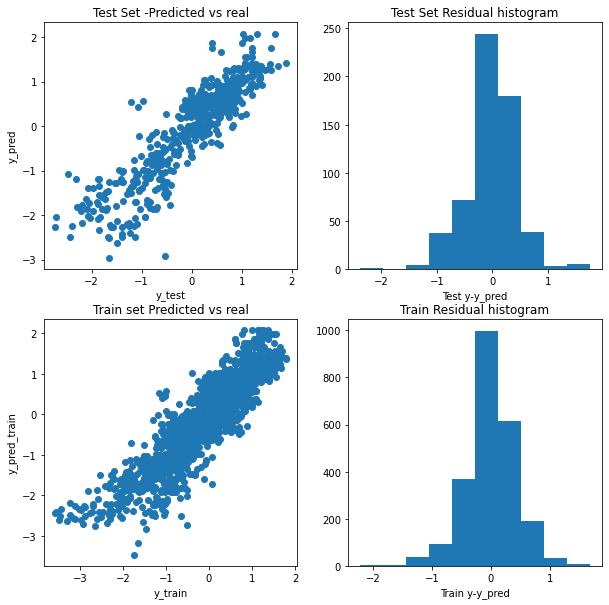

In [30]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [31]:
train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 0.17721939536542247 -- test MSE: 0.20564130442487016


In [32]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 0.4209743405071412 -- test RMSE: 0.4534769061648787


In [33]:
train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 0.17721939536542247 -- test MAE: 0.20564130442487016


In [34]:
r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

0.8012484402771715
0.8012484402771715


In [35]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.798155030787322


In [36]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     563.3
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:35:37   Log-Likelihood:                -1301.3
No. Observations:                2350   AIC:                             2643.
Df Residuals:                    2330   BIC:                             2758.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     